## Startup of a CSTR

You can download Fogler's book from here: https://doku.pub/download/h-scott-fogler-essentials-of-chemical-reaction-engineering-z0x2ze484wqn

Text(0.5, 0, 't (h)')

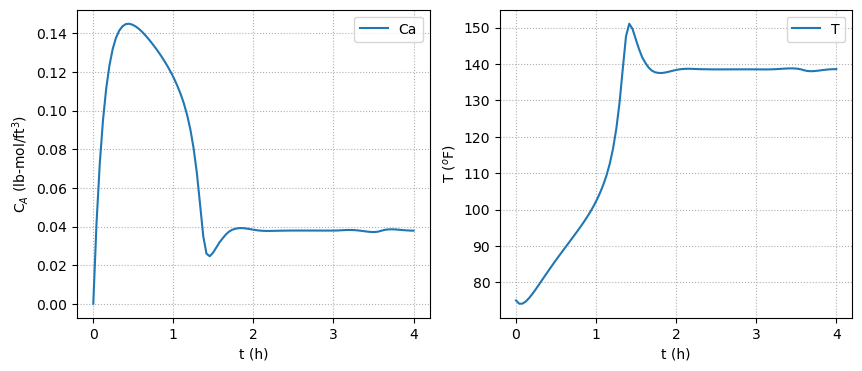

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# initially there is only water
Cai = 0.0
Cbi = 3.45
Cci = 0.0
Cmi = 0.0

Ci_init = np.array([Cai, Cbi, Cci, Cmi])

# The feed stream consists lb-mol/h 
Fa0 = 80 
Fb0 = 1000
Fm0 = 100

# Btu/lb-mol·°F
Cpa = 35
Cpb = 18
Cpc = 46
Cpm = 19.5
Cpw = 18

#  lb-mol/ft3
rho_a0 = 0.923
rho_b0 = 3.45
rho_m0 = 1.54

v0 = Fa0/rho_a0 + Fb0/rho_b0 + Fm0/rho_m0 # ft3/h
V = (1/7.484)*500 # ft3

tau = V/v0 # h-1

# lb-mol/ft3
Ca0 = Fa0/v0
Cb0 = Fb0/v0
Cc0 = 0/v0
Cm0 = Fm0/v0

T0 = 75 # °F
Ta1 = 60 # °F

UA = 16000 # Btu/(h°F)
mc = 1000 # lb-mol/h

ThetaCp = Cpa + Fb0/Fa0*Cpb + Fm0/Fa0*Cpm

dH_rx = -36000 # Btu/(lb-mol A)

def ode_system(t, y, *args):

    C = y[:-1]
    T = y[-1]
    
    k = 16.96e12*np.exp(-32400/1.987/(T + 460))
    
    ra = -k*C[0]
    rb = -k*C[0]
    rc = k*C[0]

    Na = C[0]*V
    Nb = C[1]*V
    Nc = C[2]*V
    Nm = C[3]*V
    
    NCp = Na*Cpa + Nb*Cpb + Nc*Cpc + Nm*Cpm
    
    dCa_dt = 1/tau*(Ca0 - C[0]) + ra
    dCb_dt = 1/tau*(Cb0 - C[1]) + rb
    dCc_dt = 1/tau*(Cc0 - C[2]) + rc
    dCm_dt = 1/tau*(Cm0 - C[3])
    
    Ta2 = T-(T-Ta1)*np.exp(-UA/(Cpw*mc))
    Q = mc*Cpw*(Ta1-Ta2)
    dT_dt = (Q - Fa0*ThetaCp*(T-T0) + dH_rx*ra*V)/NCp
    
    return np.hstack([dCa_dt, dCb_dt, dCc_dt, dCm_dt, dT_dt])

tspan = np.linspace(0, 4, 100)

args = (V, Cpa, Cpb, Cpc, Cpm, Cpw, Ca0, Cb0, Cc0, Cm0, tau, UA, Ta1, T0, mc, ThetaCp, dH_rx)

# initial conditions taken from the example
y0 = np.append(Ci_init, T0)
sol = solve_ivp(ode_system, (0, tspan[-1]), y0, t_eval = tspan, args = args)

fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

ax[0].plot(sol.t, sol.y[0], label = "Ca")
ax[0].legend()
ax[0].grid(linestyle = ":")
ax[0].set_ylabel("C$_A$ (lb-mol/ft$^3$)")
ax[0].set_xlabel("t (h)")

ax[1].plot(sol.t, sol.y[4], label = "T")
ax[1].legend()
ax[1].grid(linestyle = ":")
ax[1].set_ylabel("T ($^o$F)")
ax[1].set_xlabel("t (h)")